In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
import warnings
warnings.simplefilter("ignore")

['sample_submission.csv', 'train.csv', 'test.csv', 'data_description.txt']


**IMPORTS**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**READ THE DATA**

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

**DATA INFO**

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


To drop the columns that have the same values in all the rows

In [6]:
#uniques = train.apply(lambda x:x.nunique())
#train = train.drop(uniques[uniques==1].index, axis=1)

Sorting categorical features and numerical features

In [7]:
cat_features = [i for i in train.columns if train.dtypes[i]=='object']
num_features = [i for i in train.columns if (train.dtypes[i]=='int64') or (train.dtypes[i]=='float64')]
train = pd.concat([train[num_features],train[cat_features]],axis=1)

cat_features = [i for i in test.columns if test.dtypes[i]=='object']
num_features = [i for i in test.columns if (test.dtypes[i]=='int64') or (test.dtypes[i]=='float64')]
test = pd.concat([test[num_features],test[cat_features]],axis=1)

In [8]:
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [9]:
train.tail()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1459,1460,20,75.0,9937,5,6,1965,1965,0.0,830,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


**DATA ANALYSIS**

In [10]:
sns.set_style('whitegrid')

Label Distribution

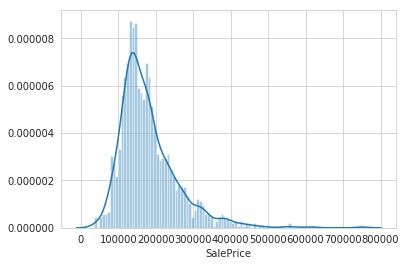

In [11]:
sns.distplot(train['SalePrice'],bins=100)

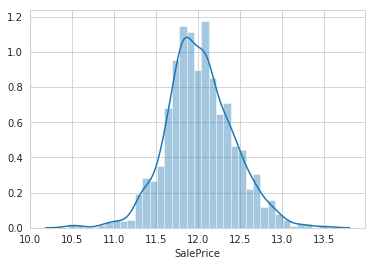

In [12]:
label = np.log(train['SalePrice'])
sns.distplot(label)

The distribution is better in the scaled values. So the label should be scaled using np.log

correlation of numerical columns

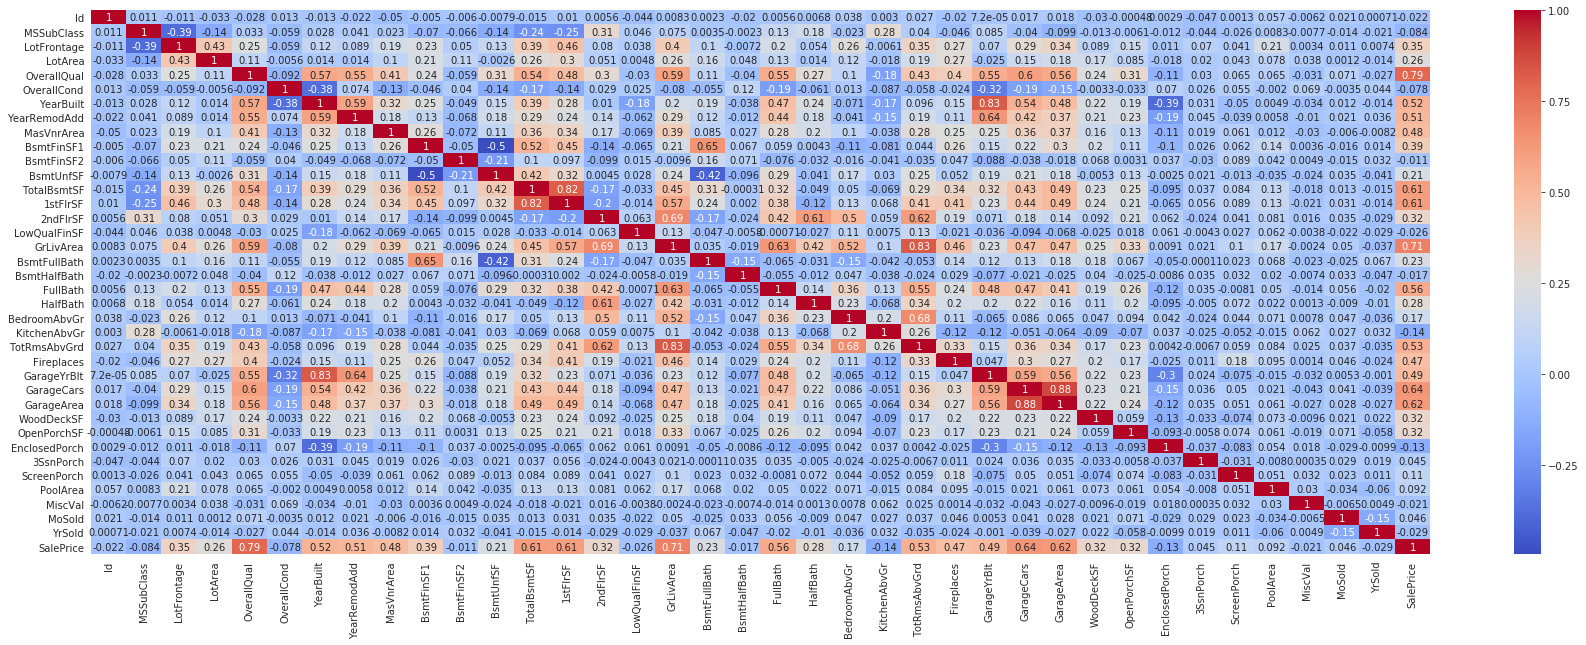

In [13]:
corr = train[train.columns[:38]].corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr,annot=True,cmap='coolwarm')

In SalePrice Correlation , 'GrLivArea','TotalBsmtSF' and 'OverallQual' are the most correlated with 'SalePrice'. Zooming the heatmap with the maximum correlation of columns with respect to 'SalePrice'

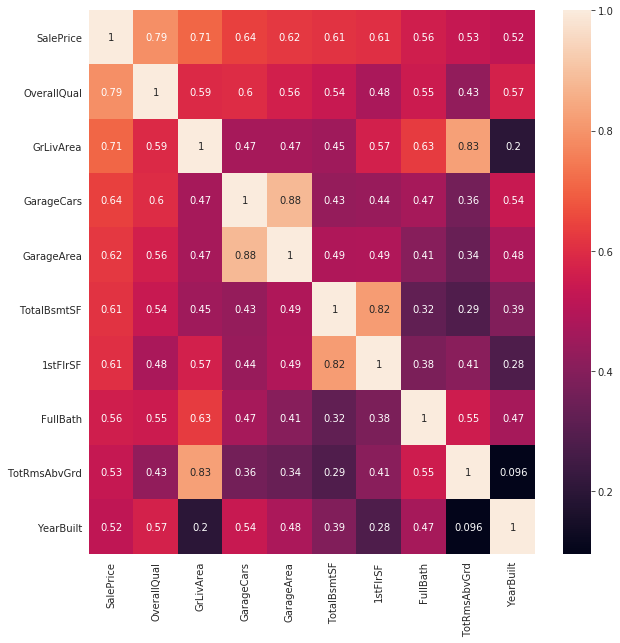

In [14]:
max_corr = corr.nlargest(10,'SalePrice')['SalePrice'].index
cols = train[max_corr].corr()
plt.figure(figsize=(10,10))
sns.heatmap(cols,annot=True)

paiplot of cols with respect to 'SalePrice'

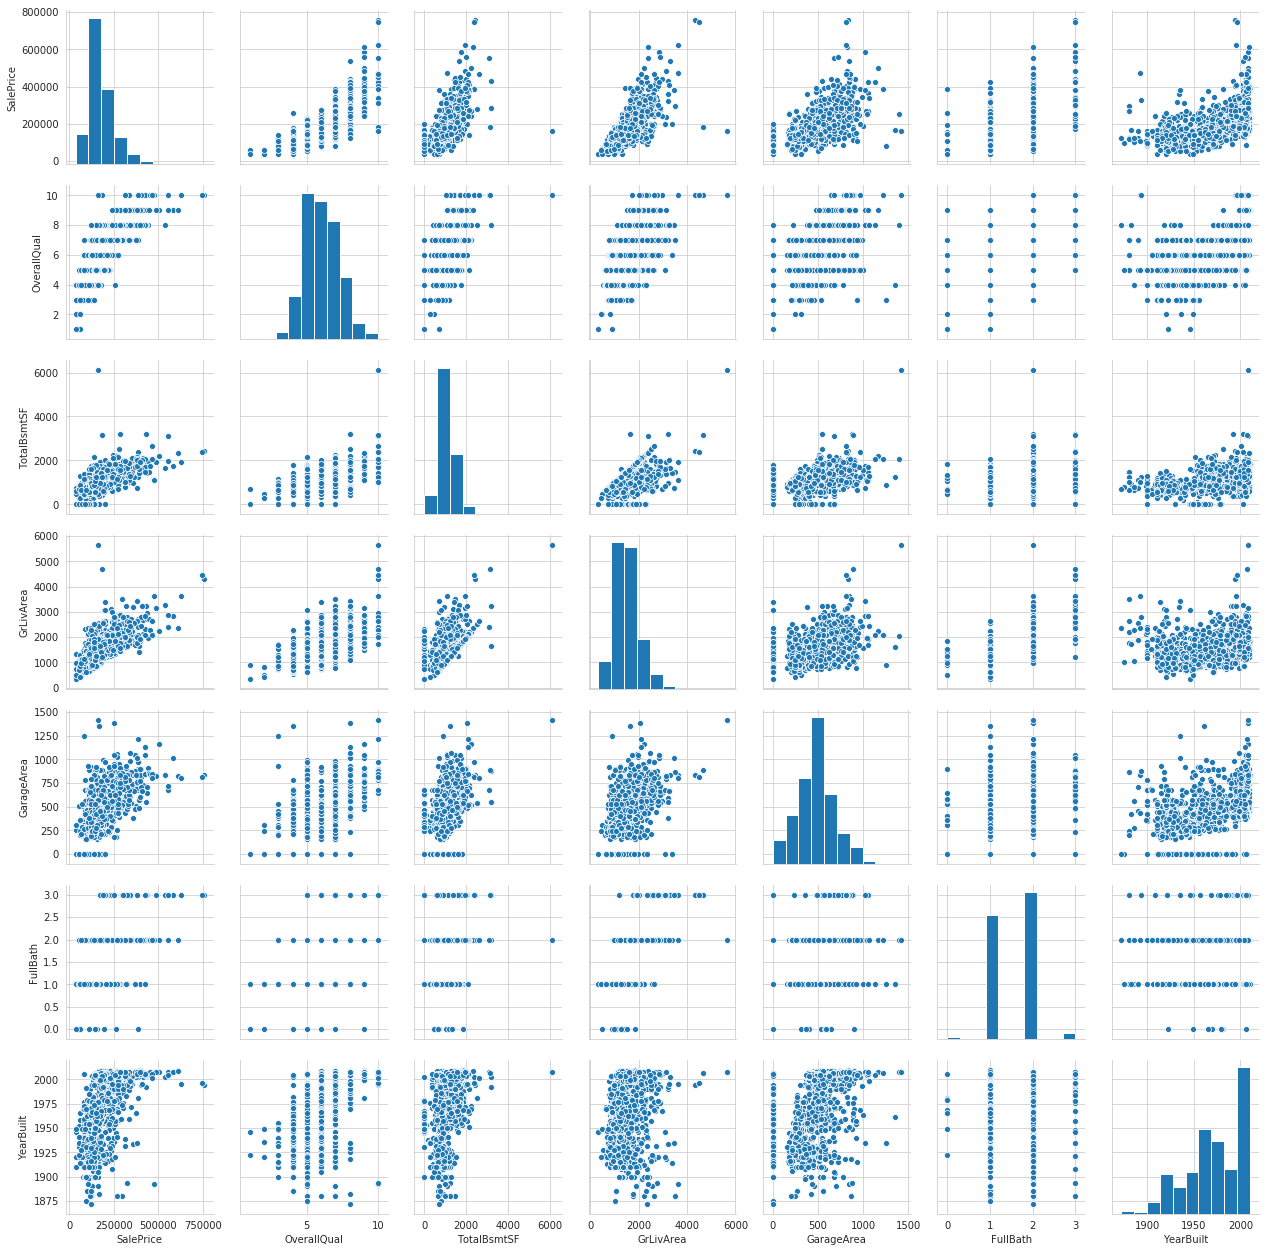

In [15]:
cols = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt']
sns.pairplot(train[cols],kind='scatter')

We can see that TotalBsmtSF and GrLivArea have some outliers. We need to remove them.
scatterplot and boxplot can be used for detecting outliars

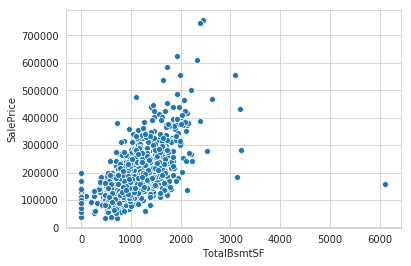

In [16]:
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train)

We can remove the record representing TotalBsmtSF > 6000

In [17]:
#train[(train['TotalBsmtSF']>6000)]
train.drop(index=[1298],inplace=True)

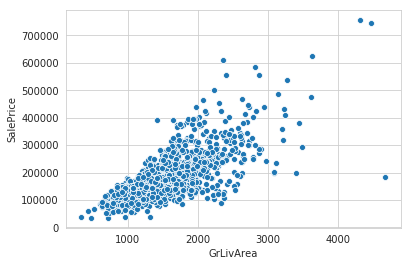

In [18]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train)

Similarly we can remove the record corresponding to GrlivArea>4000 and SalePrice<20000

In [19]:
train[(train['GrLivArea']>4000)]["SalePrice"]
train.drop(index=[523],inplace=True)

Categorical Plots for understanding Categorical data

SaleCondition

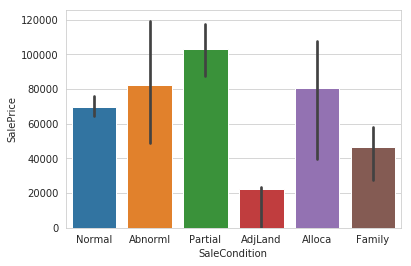

In [20]:
sns.barplot(x='SaleCondition',y='SalePrice',data=train,estimator=np.std)

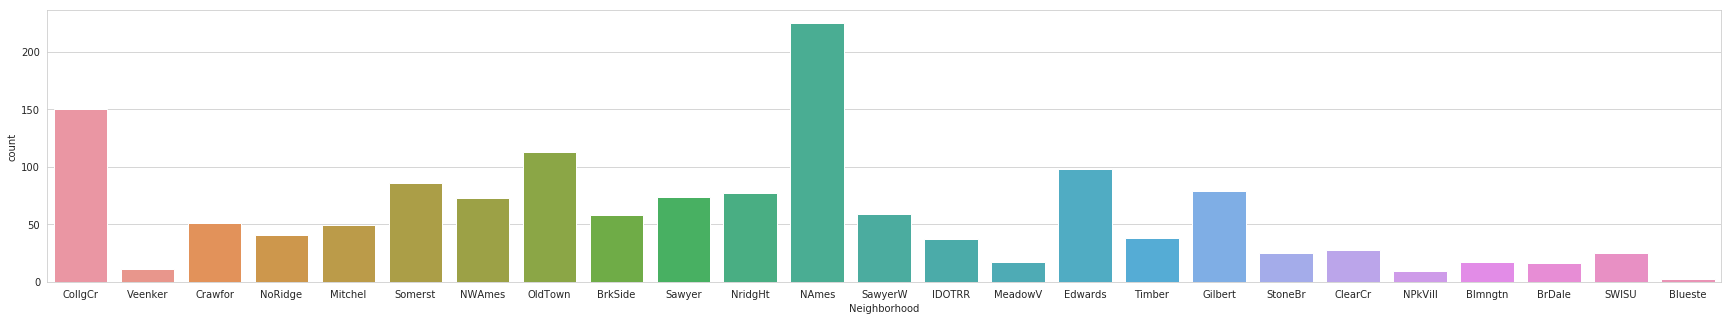

In [21]:
plt.figure(figsize=(30,5))
sns.countplot(train['Neighborhood'])

We can create clusters with similar neighbourhood.

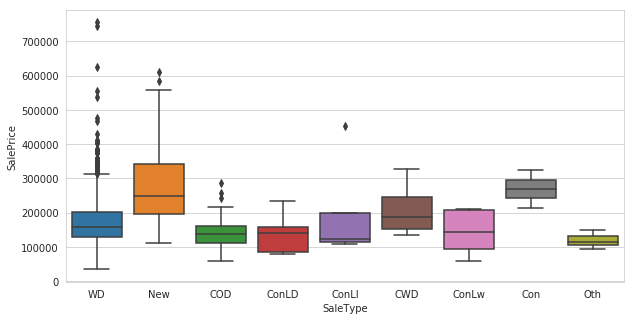

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x='SaleType',y='SalePrice',data=train)

**Feature Engineering**

In [23]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values=np.nan,strategy='mean',axis=0)
imputer = imputer.fit(train.iloc[:,1:37])
train.iloc[:,1:37] = imputer.transform(train.iloc[:,1:37])
test.iloc[:,1:37] = imputer.transform(test.iloc[:,1:37])

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [24]:
features = list(train.columns[38:])
for i in features:
    train[i].fillna(value='None',inplace=True)
    test[i].fillna(value='None',inplace=True)
#print(features)

In [25]:
#train.info()

In [26]:
#test.info()

In [27]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
def encode_features(train,test):
    features = list(train.columns[38:])
    comb = pd.concat([train[features],test[features]])
    
    for feature in features:
        le = LabelEncoder()
        le = le.fit(comb[feature])
        train[feature] = le.transform(train[feature])
        test[feature] = le.transform(test[feature])
    return train,test
train,test = encode_features(train,test)

In [28]:
train = pd.get_dummies(train,columns=features,drop_first=True)
test = pd.get_dummies(test,columns=features,drop_first=True)
missing_cols = set( train.columns ) - set( test.columns )
for c in missing_cols:
    test[c] = 0
test = test[train.columns]

In [29]:
y_train = train['SalePrice'].values
x_train = train.drop(['SalePrice','Id'],axis=1).values
test = test.drop(['SalePrice','Id'],axis=1).values

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.2)
#y_train = np.log(y_train)
#y_test = np.log(y_test)

In [31]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.transform(x_test)
test = ms.transform(test)

In [32]:
maxprice = train['SalePrice'].max()
y_train = y_train/maxprice
y_test = y_test/maxprice

Neural network with 3 Layers

In [33]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

reg = Sequential()

reg.add(Dense(output_dim=128,init='uniform',activation='relu',input_dim=259))
reg.add(Dropout(0.15))
reg.add(Dense(output_dim=128,init='uniform',activation='relu'))
reg.add(Dropout(0.15))
reg.add(Dense(output_dim=1,init='uniform',activation='linear'))

reg.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])

reg.fit(x_train, y_train, epochs=5, batch_size=20,  verbose=1)

Using TensorFlow backend.


Epoch 1/5
1166/1166 [==============================] - 3s 3ms/step - loss: 0.0087 - mean_squared_error: 0.0087 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 27.2593 - cosine_proximity: -0.9897
Epoch 2/5
1166/1166 [==============================] - 0s 159us/step - loss: 0.0024 - mean_squared_error: 0.0024 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 14.6399 - cosine_proximity: -1.0000
Epoch 3/5
1166/1166 [==============================] - 0s 173us/step - loss: 0.0020 - mean_squared_error: 0.0020 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 13.9180 - cosine_proximity: -1.0000
Epoch 4/5
1166/1166 [==============================] - 0s 154us/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0277 - mean_absolute_percentage_error: 12.1355 - cosine_proximity: -1.0000
Epoch 5/5
1166/1166 [==============================] - 0s 155us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0290 - mean_

GridSearch for NN with 3 layers

In [34]:
"""from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build(optimizer):
    reg = Sequential()

    reg.add(Dense(output_dim=128,init='uniform',activation='relu',input_dim=259))
    reg.add(Dropout(0.1))
    reg.add(Dense(output_dim=128,init='uniform',activation='relu'))
    reg.add(Dropout(0.1))
    reg.add(Dense(output_dim=1,init='uniform',activation='linear'))

    reg.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae', 'mape', 'cosine'])
    return reg

reg = KerasClassifier(build_fn=build)

parameters = [{'batch_size':[20,25,30] ,
              'epochs':[5,10] , 
              'optimizer':['adam','rmsprop']}]

grid_search = GridSearchCV(estimator=reg,param_grid=parameters,scoring='neg_mean_absolute_error',cv=10)

grid_search = grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
print(grid_search.best_estimator_)"""

"from keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import GridSearchCV\n\ndef build(optimizer):\n    reg = Sequential()\n\n    reg.add(Dense(output_dim=128,init='uniform',activation='relu',input_dim=259))\n    reg.add(Dropout(0.1))\n    reg.add(Dense(output_dim=128,init='uniform',activation='relu'))\n    reg.add(Dropout(0.1))\n    reg.add(Dense(output_dim=1,init='uniform',activation='linear'))\n\n    reg.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae', 'mape', 'cosine'])\n    return reg\n\nreg = KerasClassifier(build_fn=build)\n\nparameters = [{'batch_size':[20,25,30] ,\n              'epochs':[5,10] , \n              'optimizer':['adam','rmsprop']}]\n\ngrid_search = GridSearchCV(estimator=reg,param_grid=parameters,scoring='neg_mean_absolute_error',cv=10)\n\ngrid_search = grid_search.fit(x_train,y_train)\n\nprint(grid_search.best_params_)\nprint(grid_search.best_estimator_)"

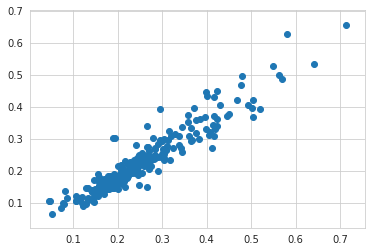

In [35]:
pred = reg.predict(x_test)
plt.scatter(y_test,pred)

Neural Network with 5 layers

In [36]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

reg = Sequential()

reg.add(Dense(output_dim=128,init='uniform',activation='relu',input_dim=259))
reg.add(Dense(output_dim=128,init='uniform',activation='relu'))
reg.add(Dropout(0.05))
reg.add(Dense(output_dim=128,init='uniform',activation='relu'))
reg.add(Dense(output_dim=128,init='uniform',activation='relu'))
reg.add(Dropout(0.05))
reg.add(Dense(output_dim=1,init='uniform',activation='linear'))

reg.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])

reg.fit(x_train, y_train, epochs=5, batch_size=20,  verbose=1)

Epoch 1/5
1166/1166 [==============================] - 1s 587us/step - loss: 0.0151 - mean_squared_error: 0.0151 - mean_absolute_error: 0.0824 - mean_absolute_percentage_error: 34.9423 - cosine_proximity: -0.9674
Epoch 2/5
1166/1166 [==============================] - 0s 194us/step - loss: 0.0027 - mean_squared_error: 0.0027 - mean_absolute_error: 0.0342 - mean_absolute_percentage_error: 14.6319 - cosine_proximity: -1.0000
Epoch 3/5
1166/1166 [==============================] - 0s 184us/step - loss: 0.0016 - mean_squared_error: 0.0016 - mean_absolute_error: 0.0264 - mean_absolute_percentage_error: 11.4655 - cosine_proximity: -1.0000
Epoch 4/5
1166/1166 [==============================] - 0s 181us/step - loss: 0.0014 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 11.3039 - cosine_proximity: -1.0000
Epoch 5/5
1166/1166 [==============================] - 0s 182us/step - loss: 0.0015 - mean_squared_error: 0.0015 - mean_absolute_error: 0.0269 - mea

GridSearch for NN with 5 layers

In [37]:
"""from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build(optimizer):
    reg = Sequential()

    reg.add(Dense(output_dim=40,init='uniform',activation='relu',input_dim=259))
    reg.add(Dense(output_dim=40,init='uniform',activation='relu'))
    reg.add(Dropout(0.05))
    reg.add(Dense(output_dim=40,init='uniform',activation='relu'))
    reg.add(Dense(output_dim=40,init='uniform',activation='relu'))
    reg.add(Dropout(0.05))
    reg.add(Dense(output_dim=1,init='uniform',activation='linear'))

    reg.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae', 'mape', 'cosine'])
    return reg

reg = KerasClassifier(build_fn=build)

parameters = [{'batch_size':[20,25,30] ,
              'epochs':[5,10] , 
              'optimizer':['adam','rmsprop']}]

grid_search = GridSearchCV(estimator=reg,param_grid=parameters,scoring='neg_mean_absolute_error',cv=10)

grid_search = grid_search.fit(x_train,y_train)

#print(grid_search.best_params_)
#print(grid_search.best_estimator_)"""

"from keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import GridSearchCV\n\ndef build(optimizer):\n    reg = Sequential()\n\n    reg.add(Dense(output_dim=40,init='uniform',activation='relu',input_dim=259))\n    reg.add(Dense(output_dim=40,init='uniform',activation='relu'))\n    reg.add(Dropout(0.05))\n    reg.add(Dense(output_dim=40,init='uniform',activation='relu'))\n    reg.add(Dense(output_dim=40,init='uniform',activation='relu'))\n    reg.add(Dropout(0.05))\n    reg.add(Dense(output_dim=1,init='uniform',activation='linear'))\n\n    reg.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae', 'mape', 'cosine'])\n    return reg\n\nreg = KerasClassifier(build_fn=build)\n\nparameters = [{'batch_size':[20,25,30] ,\n              'epochs':[5,10] , \n              'optimizer':['adam','rmsprop']}]\n\ngrid_search = GridSearchCV(estimator=reg,param_grid=parameters,scoring='neg_mean_absolute_error',cv=10)\n\ngrid_search = grid_search.fit(x_train,y_trai

Machine Learning Algorithms

In [38]:
#from sklearn.ensemble import RandomForestRegressor
#reg = RandomForestRegressor(n_estimators=150)

#from xgboost import XGBClassifier
#model = XGBClassifier()

#from sklearn.svm import SVC
#model = SVC(kernel='linear')

#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression()

#reg.fit(x_train,y_train)

Predictions

In [39]:
pred = reg.predict(x_test)
#pred = grid_search.predict(x_test)

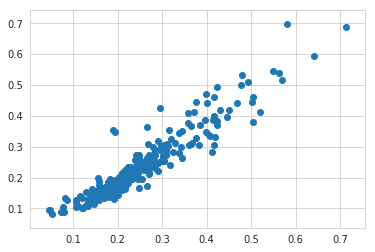

In [40]:
plt.scatter(y_test,pred)

In [41]:
for i in range(len(y_test)):
    print(y_test[i],pred[i])

0.10993377483443709 [0.10731719]
0.19271523178807948 [0.18118218]
0.10596026490066225 [0.10368735]
0.5046357615894039 [0.37862945]
0.0728476821192053 [0.08945227]
0.14635761589403973 [0.11301275]
0.36688741721854307 [0.31213808]
0.3080794701986755 [0.27148208]
0.39933774834437086 [0.4713513]
0.2847682119205298 [0.2738962]
0.1695364238410596 [0.15692747]
0.3576158940397351 [0.3781664]
0.41721854304635764 [0.3038959]
0.24503311258278146 [0.19515105]
0.18543046357615894 [0.17026944]
0.5013245033112583 [0.44462293]
0.25695364238410595 [0.23946868]
0.2993377483443709 [0.25357547]
0.3708609271523179 [0.41230112]
0.5033112582781457 [0.4616059]
0.24370860927152319 [0.20839052]
0.2980132450331126 [0.30149323]
0.17086092715231788 [0.14864668]
0.15880794701986756 [0.14052583]
0.27947019867549666 [0.3003401]
0.04622516556291391 [0.09431484]
0.304635761589404 [0.27039242]
0.1986754966887417 [0.17093138]
0.19827814569536423 [0.17504841]
0.16711920529801325 [0.14809258]
0.20927152317880796 [0.2158874

In [43]:
res = reg.predict(test)
#res = grid_search.predict(test)

In [44]:
submission = pd.read_csv('../input/test.csv')
final = submission[['Id']].copy()
final['SalePrice'] = res
del submission

In [45]:
#final['SalePrice'] = np.exp(final["SalePrice"])
final['SalePrice'] = final['SalePrice']*maxprice

In [ ]:
final

In [ ]:
final.to_csv('house_price_pred.csv',index=False)